In [1]:
!pip install segmentation-models

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
from PIL import Image
from patchify import patchify
#import segmentation_models as sm
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [3]:
patch_size = 256
scaler = MinMaxScaler()
image_dataset = []
for root,dirs,files in os.walk("Semantic segmentation dataset"):
    path = root.split(os.path.sep)[-1]
    if path == "images":
        images = os.listdir(root)
        images.sort()
        for i,image_name in enumerate(images):
            if image_name.endswith(".jpg"):
                print("Adding the image : " + root + "/" + image_name)
                image = cv2.imread(root + "/" + image_name,1)
                size_x = (image.shape[1]//patch_size)*patch_size
                size_y = (image.shape[0]//patch_size)*patch_size
                image = Image.fromarray(image)
                image = image.crop((0,0,size_x, size_y))
                image = np.array(image)
                
                patches = patchify(image,(patch_size, patch_size, 3),step = patch_size)
                #patches = np.squeeze(patches)
                
                for i in range (patches.shape[0]):
                    for j in range (patches.shape[1]):
                        single_patch = patches[i,j,:,:]
                        single_patch = scaler.fit_transform(single_patch.reshape(-1, single_patch.shape[-1])).reshape(single_patch.shape)
                        single_patch = single_patch[0]
                        
                        image_dataset.append(single_patch)
            

Adding the image : Semantic segmentation dataset\Tile 1\images/image_part_001.jpg
Adding the image : Semantic segmentation dataset\Tile 1\images/image_part_002.jpg
Adding the image : Semantic segmentation dataset\Tile 1\images/image_part_003.jpg
Adding the image : Semantic segmentation dataset\Tile 1\images/image_part_004.jpg
Adding the image : Semantic segmentation dataset\Tile 1\images/image_part_005.jpg
Adding the image : Semantic segmentation dataset\Tile 1\images/image_part_006.jpg
Adding the image : Semantic segmentation dataset\Tile 1\images/image_part_007.jpg
Adding the image : Semantic segmentation dataset\Tile 1\images/image_part_008.jpg
Adding the image : Semantic segmentation dataset\Tile 1\images/image_part_009.jpg
Adding the image : Semantic segmentation dataset\Tile 2\images/image_part_001.jpg
Adding the image : Semantic segmentation dataset\Tile 2\images/image_part_002.jpg
Adding the image : Semantic segmentation dataset\Tile 2\images/image_part_003.jpg
Adding the image

In [4]:
mask_dataset = []
patch_size = 256
for root,dirs,files in os.walk("Semantic segmentation dataset"):
    path = root.split(os.path.sep)[-1]
    if path == "masks":
        images = os.listdir(root)
        images.sort()
        
        for i,image_name in enumerate(images):
            if image_name.endswith(".png"):
                print("Adding the image : " + root + " \ " + image_name)
                image = cv2.imread(root + "/" + image_name,1)
                image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                size_x = (image.shape[1]//patch_size)*patch_size
                size_y = (image.shape[0]//patch_size)*patch_size
                image = Image.fromarray(image)
                image = image.crop((0,0,size_x, size_y))
                image = np.array(image)
                
                patches = patchify(image, (patch_size, patch_size, 3), step = patch_size)
                #patches = np.squeeze(patches)
                for i in range(patches.shape[0]):
                    for j in range(patches.shape[1]):
                        single_patch = patches[i,j,:,:]
                        single_patch = single_patch[0]
                        
                        mask_dataset.append(single_patch)

Adding the image : Semantic segmentation dataset\Tile 1\masks \ image_part_001.png
Adding the image : Semantic segmentation dataset\Tile 1\masks \ image_part_002.png
Adding the image : Semantic segmentation dataset\Tile 1\masks \ image_part_003.png
Adding the image : Semantic segmentation dataset\Tile 1\masks \ image_part_004.png
Adding the image : Semantic segmentation dataset\Tile 1\masks \ image_part_005.png
Adding the image : Semantic segmentation dataset\Tile 1\masks \ image_part_006.png
Adding the image : Semantic segmentation dataset\Tile 1\masks \ image_part_007.png
Adding the image : Semantic segmentation dataset\Tile 1\masks \ image_part_008.png
Adding the image : Semantic segmentation dataset\Tile 1\masks \ image_part_009.png
Adding the image : Semantic segmentation dataset\Tile 2\masks \ image_part_001.png
Adding the image : Semantic segmentation dataset\Tile 2\masks \ image_part_002.png
Adding the image : Semantic segmentation dataset\Tile 2\masks \ image_part_003.png
Addi

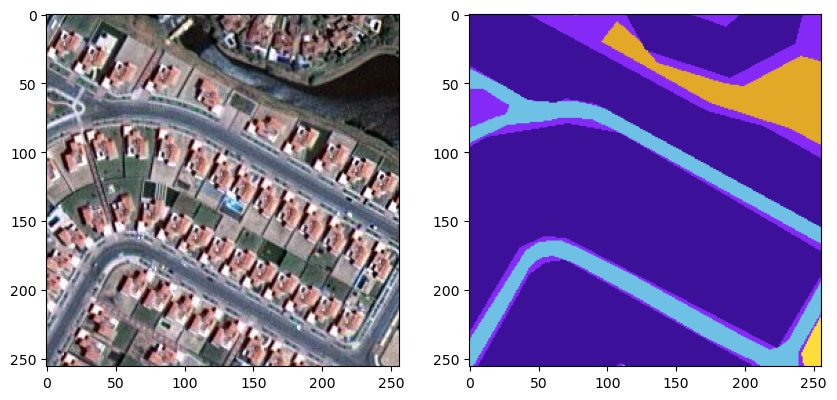

In [5]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)
import random
image_num = random.randint(0,len(image_dataset))
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.imshow(image_dataset[image_num])
plt.subplot(122)
plt.imshow(mask_dataset[image_num])
plt.show()

In [6]:
water = "#E2A929"
water = water.lstrip("#")
water = np.array(tuple(int(water[i:i+2], 16) for i in (0, 2, 4)))

Land = "#8429F6"
Land = Land.lstrip("#")
Land = np.array(tuple(int(Land[i:i+2], 16) for i in (0,2,4)))

Road = "#6EC1E4"
Road = Road.lstrip("#")
Road = np.array(tuple(int(Road[i:i+2], 16) for i in (0,2,4)))

Building = "#3C1098"
Building = Building.lstrip("#")
Building = np.array(tuple(int(Building[i:i+2],16) for i in (0,2,4)))

Vegetation = "#FEDD3A"
Vegetation = Vegetation.lstrip("#")
Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16) for i in (0,2,4)))

Unlabeled = "#9B9B9B"
Unlabeled = Unlabeled.lstrip("#")
Unlabeled = np.array(tuple(int(Unlabeled[i:i+2], 16) for i in (0, 2, 4)))

In [7]:
def convert_labels(label):
    label_new = np.zeros(label.shape,dtype=np.uint8)
    label_new [np.all(label == Building,axis=-1)] = 0
    label_new [np.all(label==Land,axis=-1)] = 1
    label_new [np.all(label==Road,axis=-1)] = 2
    label_new [np.all(label==Vegetation,axis=-1)] = 3
    label_new [np.all(label==water,axis=-1)] = 4
    label_new [np.all(label==Unlabeled,axis=-1)] = 5
   
    label_new = label_new[:,:,0]
    
    return label_new    

labels = []
for i in range(0, mask_dataset.shape[0]):
    label = convert_labels(mask_dataset[i])
    labels.append(label)
    
labels = np.array(labels)
labels = np.expand_dims(labels, axis = 3)


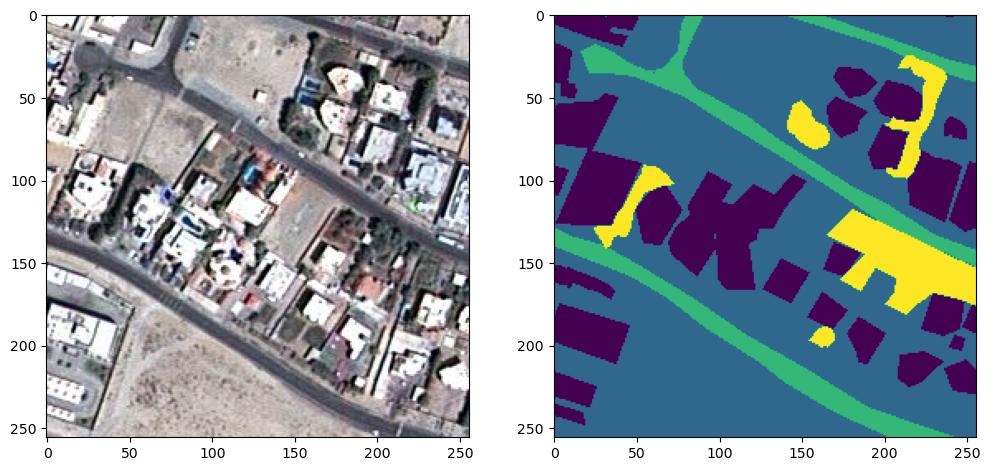

In [8]:
import matplotlib.image as mpimg 
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
#img = mpimg.imread(labels[image_number])

plt.imshow(labels[image_number])
plt.show()

In [9]:
no_classes = len(np.unique(labels))
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels, no_classes)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(image_dataset, labels, test_size = 0.2, random_state = 0)

In [11]:
X_train.shape

(1044, 256, 256, 3)

In [12]:
from tensorflow.keras.models import Model
def unet_model (n_classes = 4, height = 256, width = 256, channels = 3):
    
    input = Input((height, width, channels))

    conv_1 = Conv2D(16,(3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(input)
    conv_1 = Dropout(0.2)(conv_1)
    conv_1 = Conv2D(16,(3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_1)
    pool_1 = MaxPool2D((2,2))(conv_1)
                  
    conv_2 = Conv2D(32, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(pool_1)
    conv_2 = Dropout(0.2)(conv_2)
    conv_2 = Conv2D(32, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_2)
    pool_2 = MaxPool2D((2,2))(conv_2)
                  
    conv_3 = Conv2D(64, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(pool_2)
    conv_3 = Dropout(0.2)(conv_3)
    conv_3 = Conv2D(64, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_3)
    pool_3 = MaxPool2D((2,2))(conv_3)
                  
    conv_4 = Conv2D(128, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(pool_3)
    conv_4 = Dropout(0.2)(conv_4)
    conv_4 = Conv2D(128, (3,3), activation = "relu", kernel_initializer= "he_normal", padding = "same")(conv_4)
    pool_4 = MaxPool2D((2,2))(conv_4)              
    
    conv_5 = Conv2D(256, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(pool_4)
    conv_5 = Dropout(0.2)(conv_5)
    conv_5 = Conv2D(256, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_5)
     
    conv_6 = Conv2DTranspose(128, (2,2), strides = (2,2), padding = "same")(conv_5)
    conv_6 = concatenate([conv_6, conv_4])
    conv_6 = Conv2D(128, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_6)
    conv_6 = Dropout(0.2)(conv_6)
    conv_6 = Conv2D(128, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_6)
                  
    conv_7 = Conv2DTranspose(64, (2,2), strides = (2,2), padding = "same")(conv_6)
    conv_7 = concatenate([conv_7, conv_3])
    conv_7 = Conv2D(64, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_7)
    conv_7 = Dropout(0.2)(conv_7)
    conv_7 = Conv2D(64, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_7)
                  
    conv_8 = Conv2DTranspose(32, (2,2), strides = (2,2), padding = "same")(conv_7)
    conv_8 = concatenate([conv_8, conv_2])
    conv_8 = Conv2D(32, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_8)
    conv_8 = Dropout(0.2)(conv_8)
    conv_8 = Conv2D(32, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_8)
                  
    conv_9 = Conv2DTranspose(16, (2,2), strides = (2,2), padding = "same")(conv_8)
    conv_9 = concatenate([conv_9, conv_1], axis = 3)
    conv_9 = Conv2D(16, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_9)
    conv_9 = Dropout(0.2)(conv_9)
    conv_9 = Conv2D(16, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_9)
                  
    output = Conv2D(no_classes, (1,1), activation = "softmax")(conv_9)
                  
    model = Model(inputs = [input], outputs = [output])
                  
    return model

In [13]:
from tensorflow.keras import backend as K

def jacard(y_true, y_pred) :
    
    y_true_c = K.flatten(y_true)
    y_pred_c = K.flatten(y_pred)
    intersection = K.sum(y_true_c*y_pred_c)
    
    return (intersection + 1.0) / (K.sum(y_true_c) + K.sum(y_pred_c) - intersection + 1.0)

def jacard_loss(y_true, y_pred):
    return -jacard(y_true,y_pred)

In [14]:
img_height = X_train.shape[1]
img_width = X_train.shape[2]
img_channels = X_train.shape[3]

metrics = ["accuracy", jacard]

def get_model ():
    return unet_model(n_classes= no_classes, height= img_height, width=img_width, channels=img_channels)


In [15]:
model = get_model()
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = metrics)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

                                                                                                  
 dropout_7 (Dropout)            (None, 128, 128, 32  0           ['conv2d_14[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_15 (Conv2D)             (None, 128, 128, 32  9248        ['dropout_7[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_transpose_3 (Conv2DTran  (None, 256, 256, 16  2064       ['conv2d_15[0][0]']              
 spose)                         )                                                                 
                                                                                                  
 concatena

In [16]:
history = model.fit(X_train, Y_train, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=100, 
                    validation_data=(X_test, Y_test), 
                    shuffle=False)

Epoch 1/100
66/66 [==============================] - 355s 5s/step - loss: 1.1939 - accuracy: 0.5427 - jacard: 0.2867 - val_loss: 1.0325 - val_accuracy: 0.6130 - val_jacard: 0.3181
Epoch 2/100
66/66 [==============================] - 331s 5s/step - loss: 0.9094 - accuracy: 0.6665 - jacard: 0.3973 - val_loss: 0.8693 - val_accuracy: 0.6975 - val_jacard: 0.3909
Epoch 3/100
66/66 [==============================] - 333s 5s/step - loss: 0.8176 - accuracy: 0.7149 - jacard: 0.4394 - val_loss: 0.8621 - val_accuracy: 0.7140 - val_jacard: 0.3525
Epoch 4/100
66/66 [==============================] - 329s 5s/step - loss: 0.7684 - accuracy: 0.7333 - jacard: 0.4617 - val_loss: 0.8125 - val_accuracy: 0.7176 - val_jacard: 0.4313
Epoch 5/100
66/66 [==============================] - 304s 5s/step - loss: 0.7297 - accuracy: 0.7457 - jacard: 0.4836 - val_loss: 0.8487 - val_accuracy: 0.7094 - val_jacard: 0.4365
Epoch 6/100
66/66 [==============================] - 279s 4s/step - loss: 0.7142 - accuracy: 0.7506 

66/66 [==============================] - 242s 4s/step - loss: 0.3909 - accuracy: 0.8640 - jacard: 0.6726 - val_loss: 0.5376 - val_accuracy: 0.8362 - val_jacard: 0.6425
Epoch 47/100
66/66 [==============================] - 242s 4s/step - loss: 0.3834 - accuracy: 0.8666 - jacard: 0.6785 - val_loss: 0.5281 - val_accuracy: 0.8378 - val_jacard: 0.6467
Epoch 48/100
66/66 [==============================] - 241s 4s/step - loss: 0.3748 - accuracy: 0.8697 - jacard: 0.6840 - val_loss: 0.5161 - val_accuracy: 0.8454 - val_jacard: 0.6565
Epoch 49/100
66/66 [==============================] - 240s 4s/step - loss: 0.3698 - accuracy: 0.8714 - jacard: 0.6881 - val_loss: 0.5562 - val_accuracy: 0.8238 - val_jacard: 0.6299
Epoch 50/100
66/66 [==============================] - 242s 4s/step - loss: 0.3765 - accuracy: 0.8693 - jacard: 0.6844 - val_loss: 0.5332 - val_accuracy: 0.8349 - val_jacard: 0.6459
Epoch 51/100
66/66 [==============================] - 240s 4s/step - loss: 0.3685 - accuracy: 0.8717 - jacar

66/66 [==============================] - 276s 4s/step - loss: 0.2103 - accuracy: 0.9243 - jacard: 0.8027 - val_loss: 0.6466 - val_accuracy: 0.8533 - val_jacard: 0.6996
Epoch 92/100
66/66 [==============================] - 271s 4s/step - loss: 0.2054 - accuracy: 0.9256 - jacard: 0.8064 - val_loss: 0.5764 - val_accuracy: 0.8597 - val_jacard: 0.7095
Epoch 93/100
66/66 [==============================] - 263s 4s/step - loss: 0.1993 - accuracy: 0.9277 - jacard: 0.8109 - val_loss: 0.5698 - val_accuracy: 0.8612 - val_jacard: 0.7151
Epoch 94/100
66/66 [==============================] - 260s 4s/step - loss: 0.1936 - accuracy: 0.9297 - jacard: 0.8160 - val_loss: 0.5958 - val_accuracy: 0.8593 - val_jacard: 0.7117
Epoch 95/100
66/66 [==============================] - 256s 4s/step - loss: 0.1915 - accuracy: 0.9302 - jacard: 0.8171 - val_loss: 0.6057 - val_accuracy: 0.8586 - val_jacard: 0.7141
Epoch 96/100
66/66 [==============================] - 257s 4s/step - loss: 0.1917 - accuracy: 0.9302 - jacar

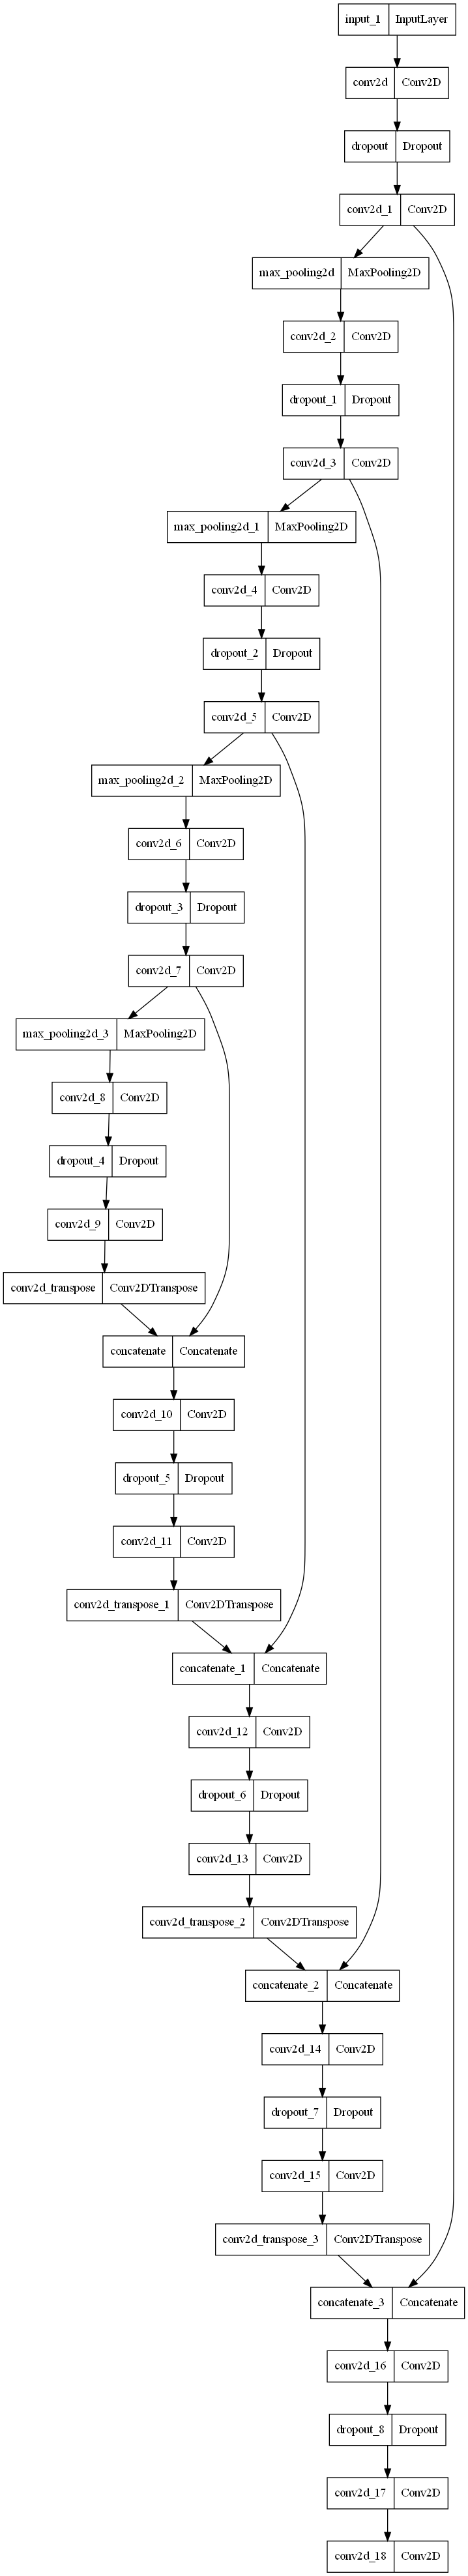

In [21]:
#import graphviz
tf.keras.utils.plot_model(model)

In [22]:
model.save("model.hd5")

INFO:tensorflow:Assets written to: model.hd5\assets


INFO:tensorflow:Assets written to: model.hd5\assets


In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "red", label = "Training Loss")
plt.plot(epochs, val_loss, "blue", label = "Validation Loss")
plt.title("Comparing the training loss and the validation loss")
plt.xlabel